# Deep leaning tutoriel
## Definitions

**Machine learning** is about defining the outcome and letting your algorithm learn the step to get here.

There is tree differents learning styles :
 * Supervised
 * Unsupervised
 * Reinforcement

**Deep Learning** is a subcategory of machine learning, it derives more precisely of neural network. The deeplearning consists to combine succesive layers of neural network.
 
**Linear Regression** models relationship between independent and dependant variables via line of best fit.

## Linear Regression using Gradient Descent algorithm

### GISS Surface Temperature Analysis from NASA


In [10]:
import plotly
plotly.__version__

'2.2.1'

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF

import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('GLB.Ts+dSST.csv')

sample_data_table = FF.create_table(df.head())
py.iplot(sample_data_table, filename='sample-data-table')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~nicolasconstanty/0 or inside your plot.ly account where it is named 'sample-data-table'


In [83]:
traces = []
for month in df:
    if (month != 'Year'):
        traces.append(go.Scatter(
                      x = df['Year'], y = df[month],
                      name= month
                      ))
layout = go.Layout(
                  title='Global-mean monthly, seasonal, and annual means (1880-present)',
                  plot_bgcolor='rgb(230, 230,230)', 
                  showlegend=True
                  )
fig = go.Figure(data=traces, layout=layout)

py.iplot(fig, filename='GLB.Ts+dSST')

These curves represent the temperature anomalies from 1880 to present, i.e. deviations from the corresponding 1951-1980 means.

### Linear regression error (formula)

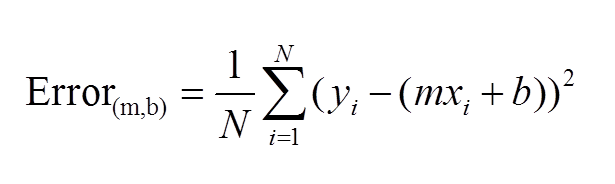

### Linear regression error (Implementation)


In [46]:

def LinearRegressionError(b, m, values):
    error = 0
    for val in values:
        error += (val[1] - (m * val[0] + b)) ** 2
    return error / float(len(values))
    

### Linear regression gradient (formula)

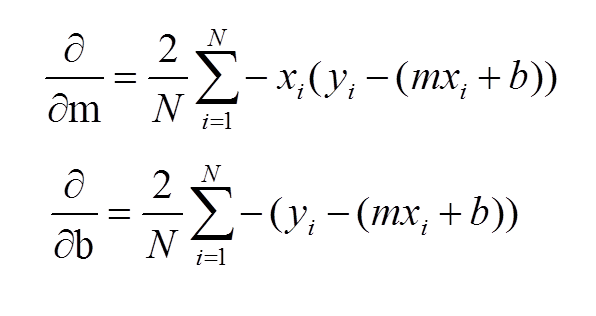

### Linear regression gradient (Implementation)

In [58]:
def step_gradient(current_b, current_m, values, learing_rate):
    gradient_b = 0
    gradient_m = 0
    n = len(values)
    for val in values:
        gradient_m += -(2 / n) * val[0] * (val[1] - (current_m * val[0] + current_b))
        gradient_b += -(2 / n) * (val[1] - (current_m * val[0] + current_b))
    new_b = current_b - (learing_rate * gradient_b)
    new_m = current_m - (learing_rate * gradient_m)
    return [new_b, new_m]

In [101]:
#iniatial_b = 0
#iniatial_m = 0
#number_iteration = 4000
#learning_rate = 0.0001

B = 0
M = 0

def run(initial_b, initial_m, number_iteration, learning_rate):
    b = initial_b
    m = initial_m
    values = []
    for i in range(len(df['Year'])):
        values.append([df['Year'][i] * 0.01, df['Jan'][i]])
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, LinearRegressionError(initial_b, initial_m, values)))
    for i in range(number_iteration):
        [b, m] = step_gradient(b, m, values, learning_rate)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(number_iteration, b, m, LinearRegressionError(b, m, values)))
    global B
    global M
    B = b
    M = m
    
if __name__ == '__main__':
    run(-2, -2, 10000, 0.00001)

trace = go.Scatter(
    x = df['Year'], y = df['Jan'],
    name= 'Jan',
    mode='markers',
    marker=dict(
        color='rgba(255, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
            symbol='circle',
            size=10,
        )
    )
xTab = [1880, 2017]
yTab = [(M * xTab[0] * 0.01 + B) * 10, (M * xTab[1] * 0.01 + B) * 10]

trace1 = go.Scatter(
    x = xTab,
    y = yTab,
    name = 'Best fit'
)
layout = go.Layout(
    title='January anomaly from 1880 to present',
    plot_bgcolor='rgb(230, 230,230)',
    showlegend=True
)
fig = go.Figure(data=[trace, trace1], layout=layout)
py.iplot(fig, filename='dot_Jan')

Starting gradient descent at b = -2, m = -2, error = 1680.778365942029
After 10000 iterations b = -1.89353794708289, m = 0.09806227293927482, error = 0.12880310132625244
